In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import data_loading_plotting_fct as dlp

In [2]:
data_lines = []
for folder in os.listdir("/home/leni/m2w_logs/m2w_3/"):
    foldername = "/home/leni/m2w_logs/m2w_3/" + folder
    names = folder.split("_")
    synch = ""
    target = ""
    if names[0] == "swg":
        synch = "synchronous"
    elif names[0] == "awg":
        synch = "asynchronous"
    if len(names) == 3:
        target = names[2]
    else:
        target = "no target"
    for replicate in os.listdir(foldername):
        fit_lines = dlp.load_fitnesses_agg(foldername + "/" + replicate)
        data_lines += [[synch,target,replicate]+fit for fit in fit_lines]
fit_data = pd.DataFrame(data=data_lines,columns=["synchronicity","target delta","replicate","time","computation time","discretized time","Number of robots","number of robots","number of new individual","mean fit","median fit","std fit","max fit","min fit"])


# Asynchronous vs Synchronous

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Figure size 1440x720 with 0 Axes>

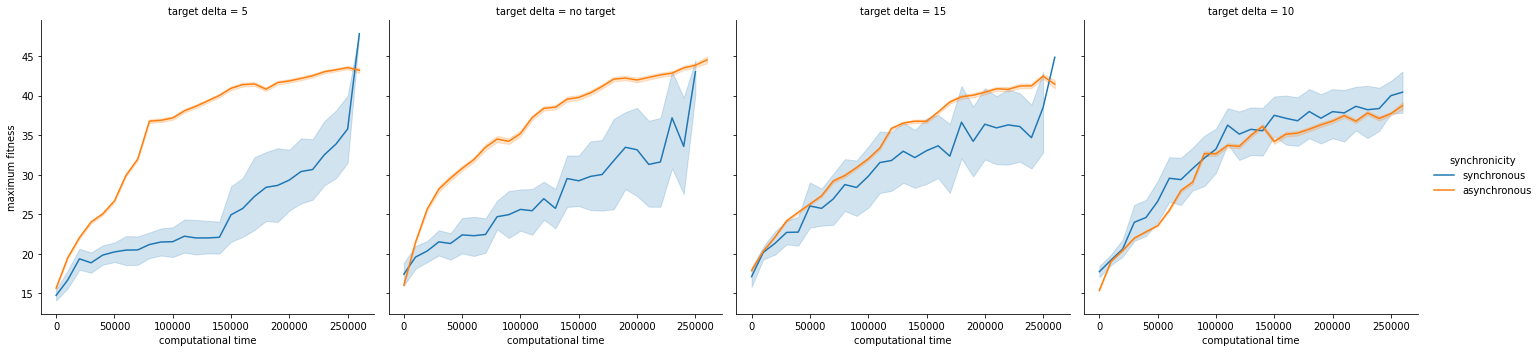

In [6]:
fig = plt.gcf()
fig.set_size_inches(20,10)
g = sns.relplot(data=fit_data,kind="line",x="discretized time",y="max fit",hue="synchronicity",col="target delta")
g.set_axis_labels("computational time","maximum fitness")


/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Figure size 1440x720 with 0 Axes>

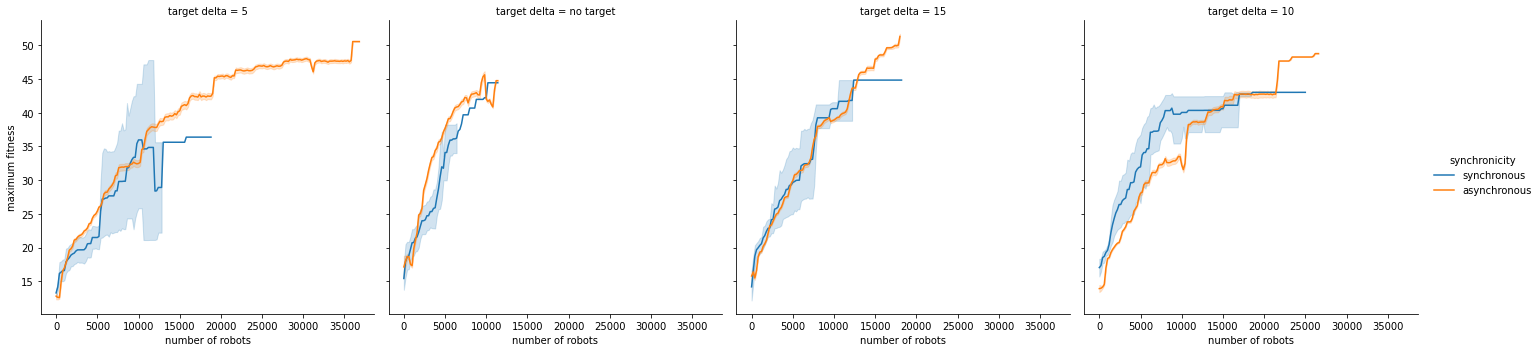

In [4]:
fig = plt.gcf()
fig.set_size_inches(20,10)
g = sns.relplot(data=fit_data,kind="line",x="Number of robots",y="max fit",hue="synchronicity",col="target delta")
g.set_axis_labels("number of robots","maximum fitness")

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Figure size 1440x720 with 0 Axes>

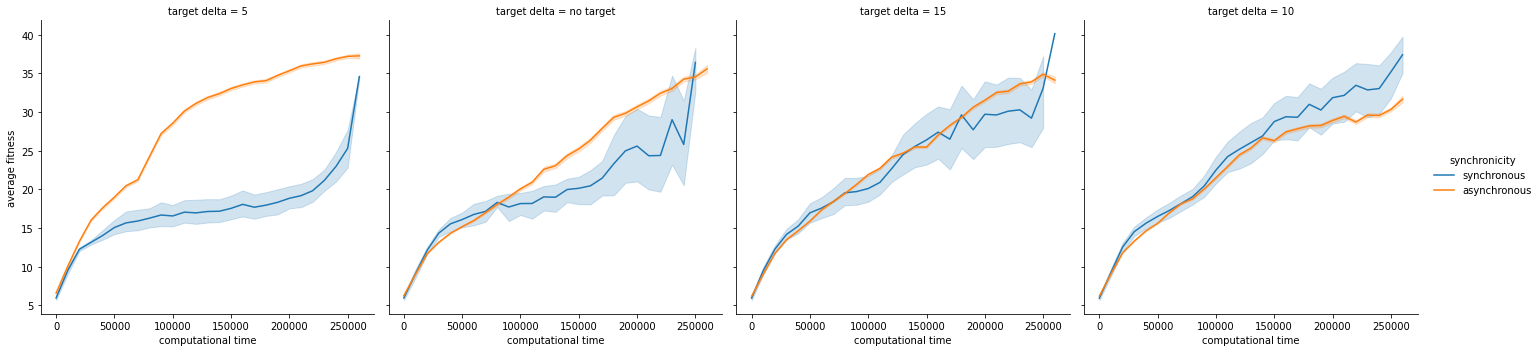

In [8]:
fig = plt.gcf()
fig.set_size_inches(20,10)
g = sns.relplot(data=fit_data,kind="line",x="discretized time",y="mean fit",hue="synchronicity",col="target delta")
g.set_axis_labels("computational time","average fitness")

# Target Delta values for Asynchronous

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

Text(0, 0.5, 'average learning duration')

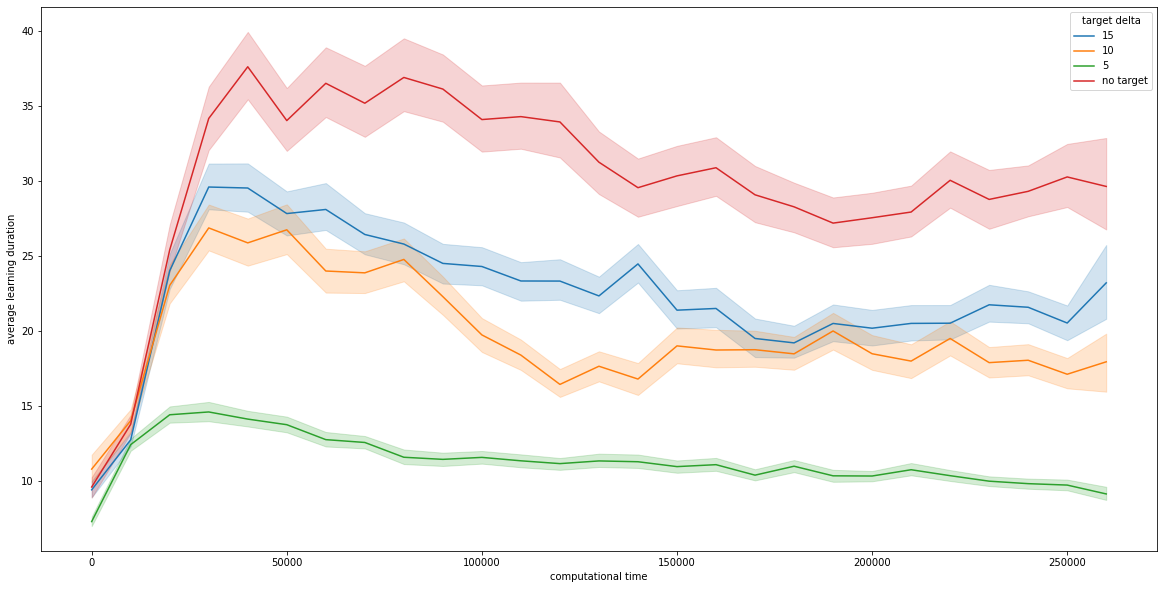

In [12]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.lineplot(data=fit_data.loc[fit_data["synchronicity"]=="asynchronous"],x="discretized time",y="time",hue="target delta")
ax.set_xlabel("computational time")
ax.set_ylabel("average learning duration")

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

Text(0, 0.5, 'median fitness')

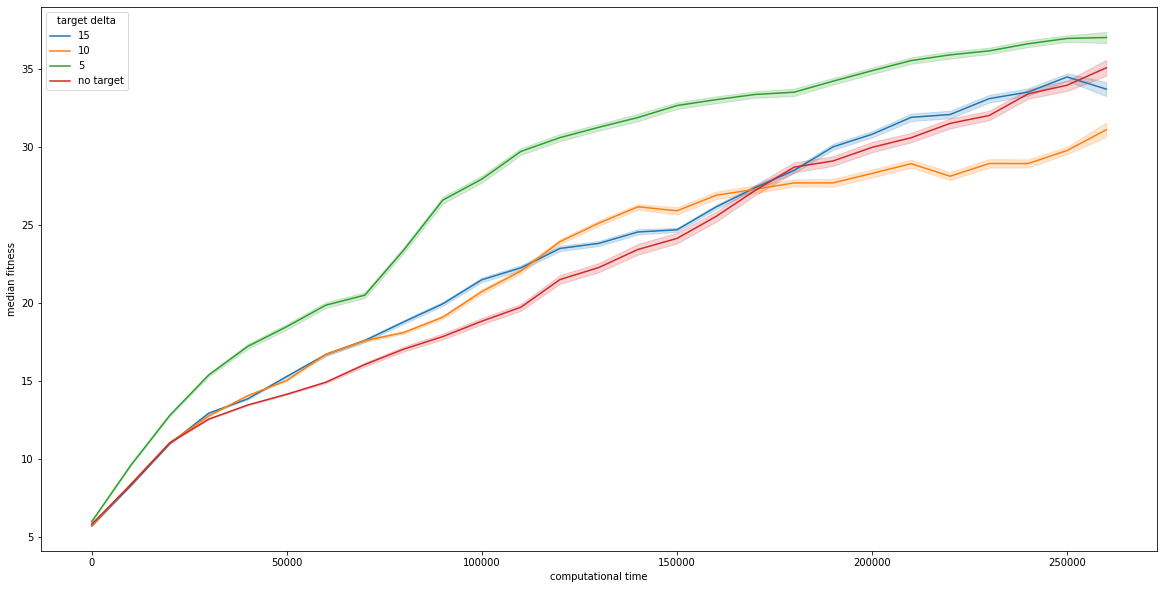

In [16]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.lineplot(data=fit_data.loc[fit_data["synchronicity"]=="asynchronous"],x="discretized time",y="median fit",hue="target delta")
ax.set_xlabel("computational time")
ax.set_ylabel("median fitness")

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

Text(0, 0.5, 'number of robots')

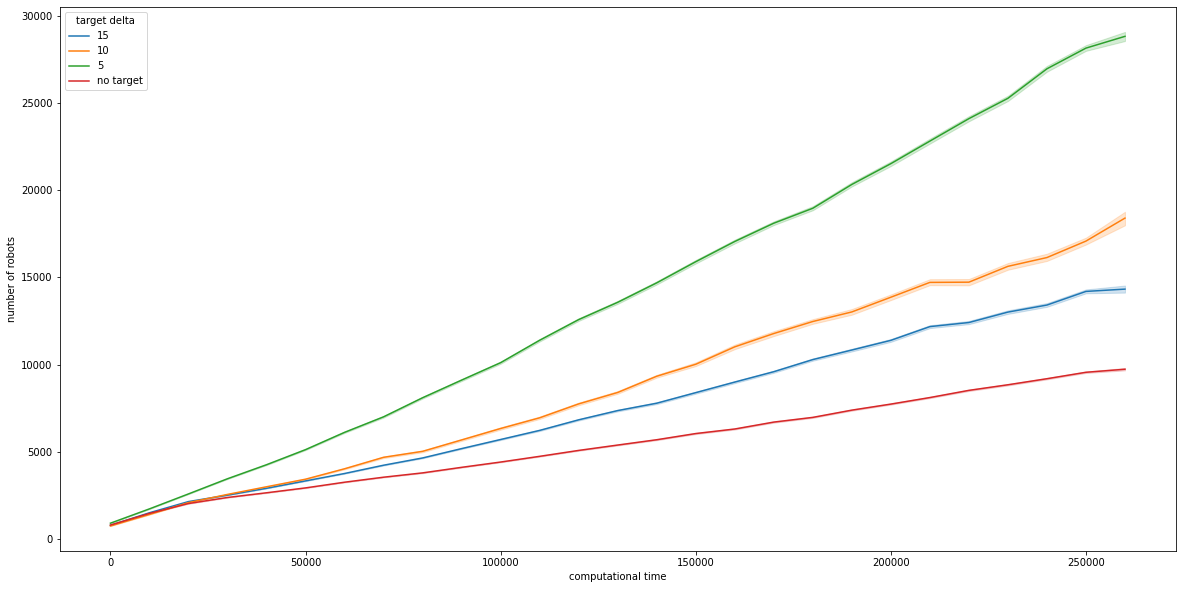

In [5]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.lineplot(data=fit_data.loc[fit_data["synchronicity"]=="asynchronous"],x="discretized time",y="number of robots",hue="target delta")
ax.set_xlabel("computational time")
ax.set_ylabel("number of robots")

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


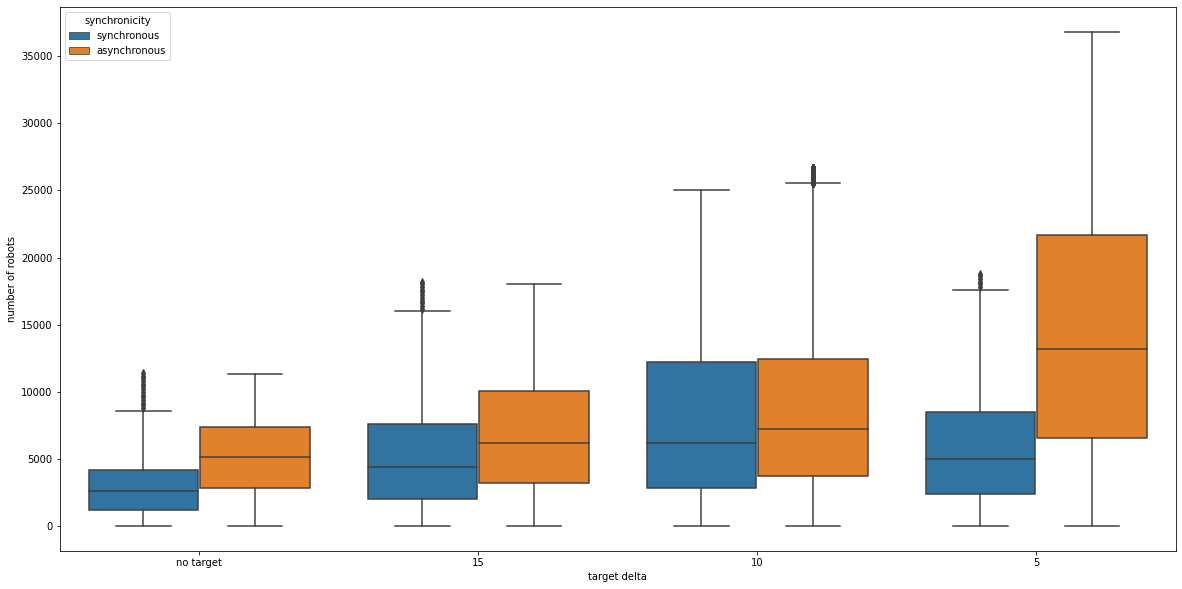

In [8]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.boxplot(data=fit_data,x="target delta",y="number of robots",hue="synchronicity",order=["no target","15","10","5"])

In [25]:
new_data_list = []
for sync in fit_data["synchronicity"].drop_duplicates():
    tmp_data = fit_data.loc[fit_data["synchronicity"]==sync]
    for td in tmp_data["target delta"].drop_duplicates():
        tmp_data = fit_data.loc[fit_data["synchronicity"]==sync].loc[fit_data["target delta"]==td]
        for rep in tmp_data["replicate"].drop_duplicates():
            print(tmp_data.loc[tmp_data["replicate"]==rep].max().transpose())
# max_data = pd.concat(new_data_list)
# print(max_data)

synchronicity                                         synchronous
target delta                                                    5
replicate                   m2w_2023_11_6_14_14_15_795076_5848738
time                                                 10837.161364
computation time                                    247027.979985
discretized time                                           250000
Number of robots                                             7400
number of robots                                             7400
number of new individual                                      200
mean fit                                                16.211237
median fit                                              15.935943
std fit                                                  2.905193
max fit                                                 21.428764
min fit                                                 15.332419
dtype: object
synchronicity                                         synchron

ValueError: No objects to concatenate

In [23]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.boxplot(data=max_data,x="target delta",y="number of robots",hue="synchronicity",order=["no target","15","10","5"])

/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/leni/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


ValueError: cannot reindex on an axis with duplicate labels

<Figure size 1440x720 with 0 Axes>